# Nacimientos en EEUU

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
births = pd.read_csv('data/births.csv')

In [4]:
births.shape

(15547, 5)

In [5]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum')#Agrupa por año

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


In [12]:
#La doble barra solo coma el cociente de la división. Al resultado lo multiplico por 10 y obtengo la década
births['decade'] = (births['year']// 10)*10

In [13]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [15]:
births.pivot_table('births', index='decade', columns = 'gender', aggfunc=sum)

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


<Figure size 864x720 with 0 Axes>

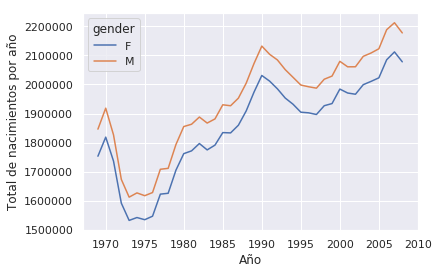

In [24]:
plt.figure(figsize=(12, 10))
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel("Total de nacimientos por año")
plt.xlabel("Año")
plt.show()

In [25]:
quartiles = np.percentile(births['births'], [25,50,75])

In [27]:
med = quartiles[1]
IQR = quartiles[2]-quartiles[0]
sig = 0.75 * IQR

In [28]:
#Limpia los datos atipicos +5 o menos +5 de dispersión
births = births.query("(births > @med - 5*@sig) & (births < @med + 5*@sig)")

In [29]:
births.shape

(14610, 6)

In [31]:
births['day'] = births['day'].astype(int)

/home/matias/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
births.index = pd.to_datetime(10000*births.year+100*births.month+births.day, format="%Y%m%d")

In [34]:
births['dayofweek'] = births.index.dayofweek

In [35]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


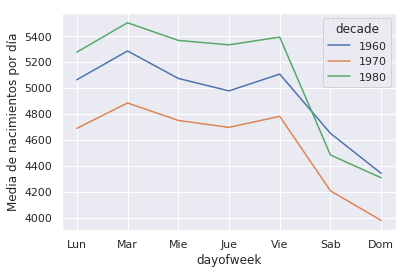

In [39]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['','Lun','Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom'])
plt.ylabel('Media de nacimientos por día')
plt.show()

In [42]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day], aggfunc='mean')

In [43]:
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [44]:
births_by_date.index = [pd.datetime(2020, month, day) for (month,day) in births_by_date.index]

In [46]:
births_by_date.head()

,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


<Figure size 864x288 with 0 Axes>

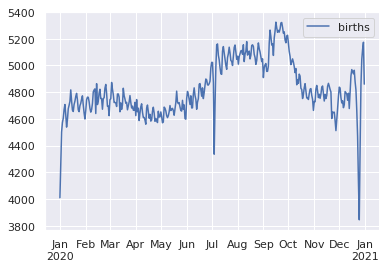

In [48]:
plt.figure(figsize=(12,4)) #Los nacimientos caen fuerte en las fiestas y feriados de EEUU
births_by_date.plot()
plt.show()